## Binary Classification: Pima Indians Diabetes Dataset
https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

** Dataset Information: **

Selected medical exams from a large database (total 768 cases) for females at least 21 years old of Pima Indian heritage.

** Attribute Information: (8 features and 1 class)**

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

** Objective of this project **

predict whether a patient has diabetes (class; 0 or 1) based on diagnostic variables (features)

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
names = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class']
df = pd.read_csv(url, names=names)

In [3]:
# Inspect Data
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

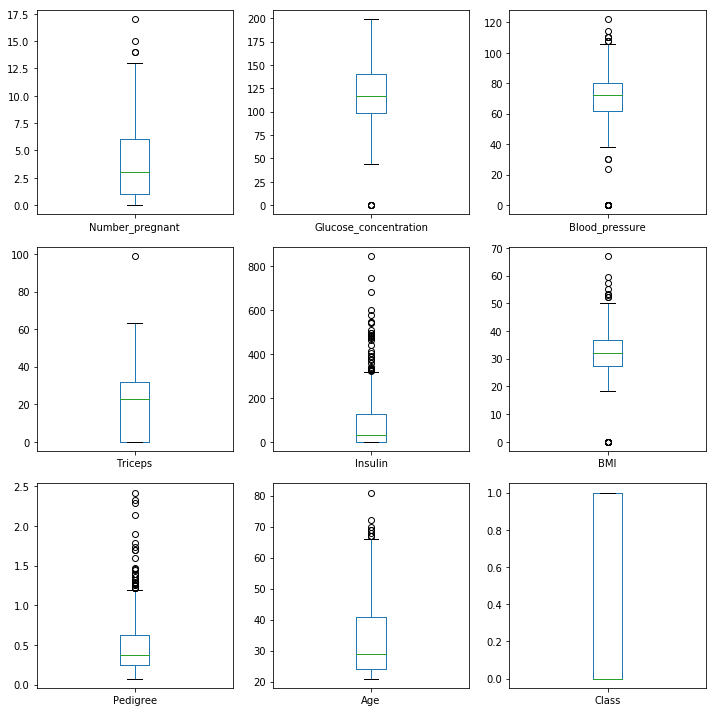

In [5]:
_ = df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))
plt.tight_layout()

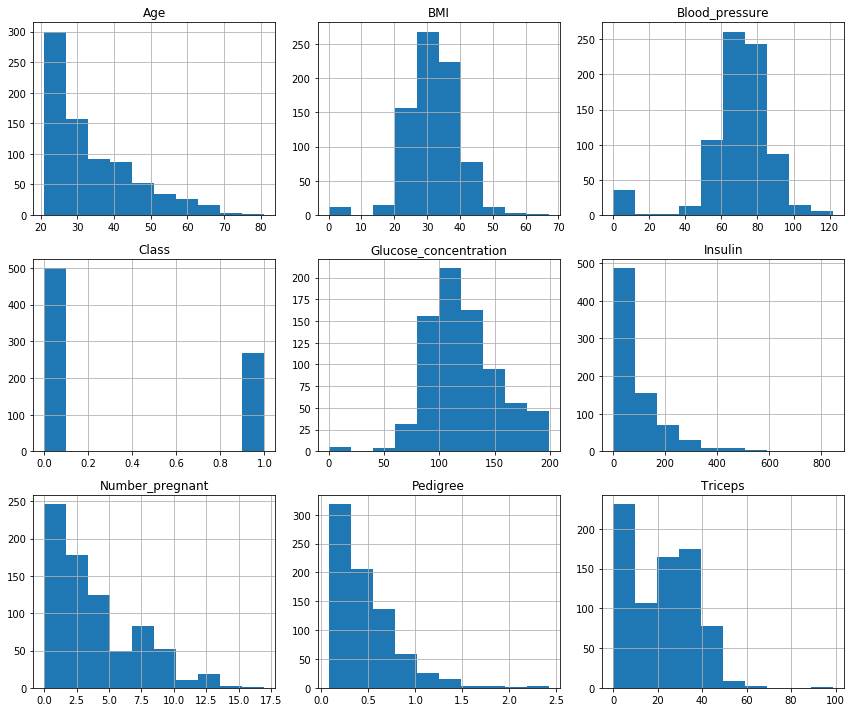

In [6]:
_ = df.hist(figsize=(12,10))
plt.tight_layout()

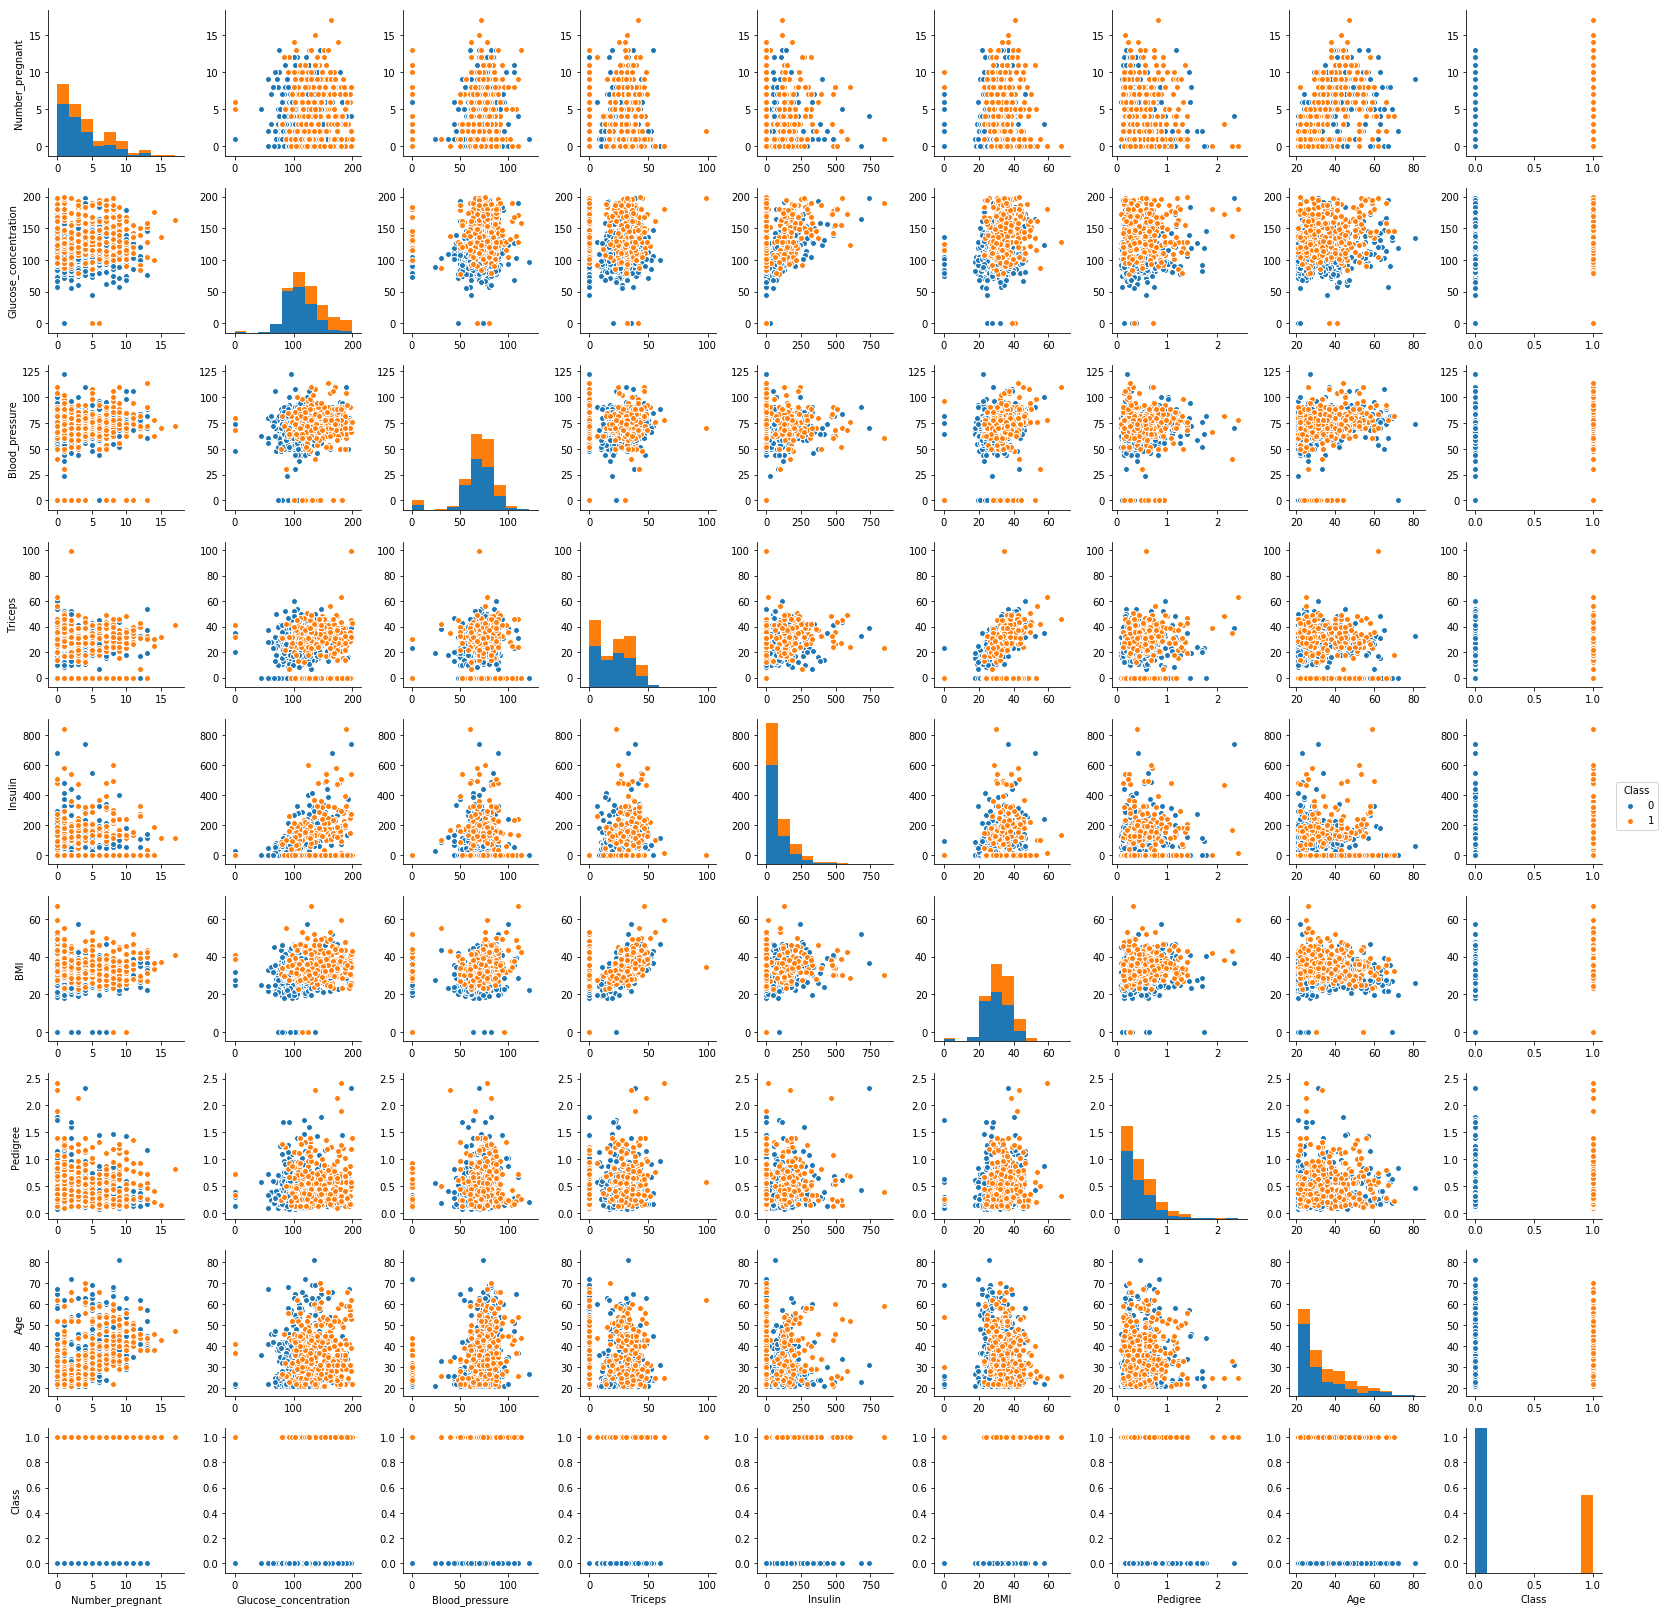

In [7]:
sns.pairplot(df, hue='Class')

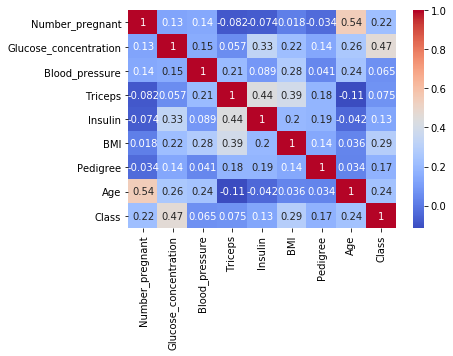

In [8]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number_pregnant          768 non-null int64
Glucose_concentration    768 non-null int64
Blood_pressure           768 non-null int64
Triceps                  768 non-null int64
Insulin                  768 non-null int64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df['Class'].value_counts() #imbalanced classes-->stratify

0    500
1    268
Name: Class, dtype: int64

In [12]:
df.isnull().any()

Number_pregnant          False
Glucose_concentration    False
Blood_pressure           False
Triceps                  False
Insulin                  False
BMI                      False
Pedigree                 False
Age                      False
Class                    False
dtype: bool

## Data preprocessing

In [5]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

** Split Features & Class (or target) **

In [6]:
X = df.drop('Class', axis=1).values
y = df['Class'].values
print(X.shape,y.shape)

(768, 8) (768,)


** Split Train Test Sets **

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [8]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array([0, 1], dtype=int64), array([400, 214], dtype=int64))

** Scale features **

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Baseline Models

In [10]:
# Import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [11]:
models = []
#linear
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#non-linear
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
#ensemble
models.append(('RF', RandomForestClassifier(n_estimators=100,random_state=seed)))
models.append(('XGB', XGBClassifier(random_state=seed)))

Accuracy: mean +/- std
LR: 76.7% +/- 4.3%
LDA: 76.2% +/- 3.9%
KNN: 74.1% +/- 3.2%
NB: 74.8% +/- 5.6%
DT: 69.6% +/- 4.3%
SVM: 75.7% +/- 3.7%
RF: 75.7% +/- 2.7%
XGB: 74.0% +/- 5.5%


Text(0,0.5,'Accuracy')

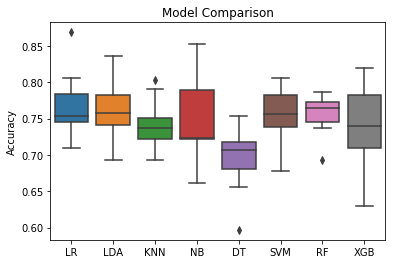

In [12]:
# cross validation
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
scoring = 'accuracy' #'roc_auc' yeilds the same ranking
names = []
results = []
print('Accuracy: mean +/- std')
for name,model in models:
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)    
    print('{}: {:0.1f}% +/- {:0.1f}%'.format(name, cv_results.mean()*100, 
                                             cv_results.std()*100))

# visualize results
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.title('Model Comparison')
plt.ylabel('Accuracy')

## Parameter Tuning
try to improve top 4 algorithms: LR, LDA, RF, SVM

#### Model 1: Logistic Regression

In [21]:
# Default
model = LogisticRegression()
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Accuracy of test set: 76.0%


In [37]:
# Grid Search
model = LogisticRegression()

# parameters
penalty = ['l1','l2'] 
C = [1.0, 0.5, 0.2, 0.1, 0.05, 0.01]
param_grid = dict(penalty=penalty, C=C)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
0.767101 (0.039549) with: {'C': 1.0, 'penalty': 'l1'}
0.767101 (0.043411) with: {'C': 1.0, 'penalty': 'l2'}
0.765472 (0.040862) with: {'C': 0.5, 'penalty': 'l1'}
0.767101 (0.043411) with: {'C': 0.5, 'penalty': 'l2'}
0.763844 (0.047852) with: {'C': 0.2, 'penalty': 'l1'}
0.763844 (0.040956) with: {'C': 0.2, 'penalty': 'l2'}
0.773616 (0.045171) with: {'C': 0.1, 'penalty': 'l1'}
0.767101 (0.037670) with: {'C': 0.1, 'penalty': 'l2'}
0.771987 (0.043100) with: {'C': 0.05, 'penalty': 'l1'}
0.762215 (0.034305) with: {'C': 0.05, 'penalty': 'l2'}
0.714984 (0.079083) with: {'C': 0.01, 'penalty': 'l1'}
0.758958 (0.050585) with: {'C': 0.01, 'penalty': 'l2'}


Best accuracy of training set: 77.4% using {'C': 0.1, 'penalty': 'l1'}
Accuracy of test set: 74.7%


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.2s finished


#### Model 2: Linear Discriminant Analysis

In [25]:
# Default
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}


Accuracy of test set: 76.6%


In [38]:
# Grid Search
model = LinearDiscriminantAnalysis()

# parameters
shrinkage = [0, 0.2, 0.4, 0.6, 0.8, 0.9, 1.0]
param_grid = [dict(solver=['svd']),dict(solver=['lsqr'], shrinkage=shrinkage)]
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
0.762215 (0.038971) with: {'solver': 'svd'}
0.762215 (0.038971) with: {'shrinkage': 0, 'solver': 'lsqr'}
0.762215 (0.038128) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.760586 (0.042004) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.758958 (0.046071) with: {'shrinkage': 0.6, 'solver': 'lsqr'}
0.752443 (0.047839) with: {'shrinkage': 0.8, 'solver': 'lsqr'}
0.757329 (0.041636) with: {'shrinkage': 0.9, 'solver': 'lsqr'}
0.752443 (0.030310) with: {'shrinkage': 1.0, 'solver': 'lsqr'}


Best accuracy of training set: 76.2% using {'solver': 'svd'}
Accuracy of test set: 76.6%


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished


#### Model 3: RandomForest

In [13]:
# Default
model = RandomForestClassifier(n_estimators=100,random_state=seed)
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


Accuracy of test set: 77.9%


In [16]:
# Grid Search
model = RandomForestClassifier(random_state=seed)

# parameters
n_estimators = [100, 250,300,350]
param_grid = dict(n_estimators=n_estimators)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   15.8s finished


0.757329 (0.026660) with: {'n_estimators': 100}
0.763844 (0.019044) with: {'n_estimators': 250}
0.765472 (0.020473) with: {'n_estimators': 300}
0.762215 (0.020801) with: {'n_estimators': 350}


Best accuracy of training set: 76.5% using {'n_estimators': 300}
Accuracy of test set: 79.2%


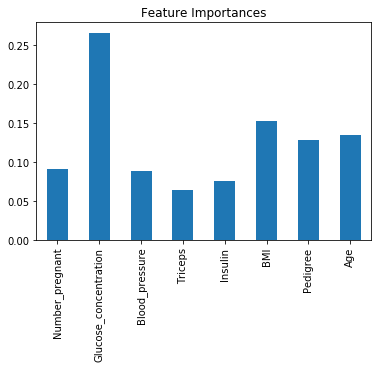

In [17]:
# Feature Importance
model = RandomForestClassifier(n_estimators=300,random_state=seed)
model.fit(X_train, y_train)
pd.DataFrame(data=model.feature_importances_,
             index=df.drop('Class',axis=1).columns).plot(kind='bar',legend=False,
                                                        title='Feature Importances')

#### Model 4: Support Vector Machine

In [27]:
# Default
model = SVC(kernel='rbf')
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Accuracy of test set: 76.0%


In [42]:
# Grid Search
model = SVC(kernel='rbf')

# parameters
C = [0.8, 0.7,0.6]
gamma = [0.01,0.009,0.008,0.007]
param_grid = dict(gamma=gamma, C=C)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
0.780130 (0.042957) with: {'C': 0.8, 'gamma': 0.01}
0.778502 (0.042846) with: {'C': 0.8, 'gamma': 0.009}
0.776873 (0.045646) with: {'C': 0.8, 'gamma': 0.008}
0.780130 (0.044614) with: {'C': 0.8, 'gamma': 0.007}
0.778502 (0.040319) with: {'C': 0.7, 'gamma': 0.01}
0.775244 (0.045424) with: {'C': 0.7, 'gamma': 0.009}
0.781759 (0.046869) with: {'C': 0.7, 'gamma': 0.008}
0.776873 (0.039452) with: {'C': 0.7, 'gamma': 0.007}
0.778502 (0.045232) with: {'C': 0.6, 'gamma': 0.01}
0.778502 (0.045002) with: {'C': 0.6, 'gamma': 0.009}
0.778502 (0.040163) with: {'C': 0.6, 'gamma': 0.008}
0.776873 (0.041271) with: {'C': 0.6, 'gamma': 0.007}


Best accuracy of training set: 78.2% using {'C': 0.7, 'gamma': 0.008}
Accuracy of test set: 74.0%


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.6s finished


## Final Model: RandomForest(n_estimators=300)

** Final Model **

In [18]:
model = RandomForestClassifier(n_estimators=300,random_state=seed)
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print('Accuracy of training set: {:0.1f}%'.format(accuracy*100))

Accuracy of training set: 100.0%


** Save and load the final model **

In [19]:
#save model to disk
import pickle
filename='model.sav'
pickle.dump(model, open(filename, 'wb'))

In [20]:
#load the model from disk
model = pickle.load(open(filename,'rb'))
accuracy = model.score(X_train, y_train)
print('Accuracy of training set: {:0.1f}%'.format(accuracy*100))

Accuracy of training set: 100.0%


** Classification report & Confusion Matrix **

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       400
          1       1.00      1.00      1.00       214

avg / total       1.00      1.00      1.00       614



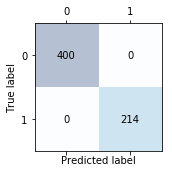

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#classification report
print(classification_report(y_train, model.predict(X_train)))

#confusion matrix
confmat = confusion_matrix(y_train, model.predict(X_train))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

In [22]:
# predict class with test set (new, unseen)
y_pred = model.predict(X_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy of test set: 79.2%


             precision    recall  f1-score   support

          0       0.79      0.92      0.85       100
          1       0.79      0.56      0.65        54

avg / total       0.79      0.79      0.78       154



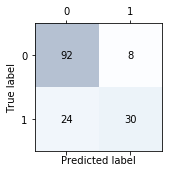

In [23]:
#classification report
print(classification_report(y_test, model.predict(X_test)))

#confusion matrix
confmat = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Summary

Best model: ** RandomForest ** w/ param: n_estimator=300

Accuracy of test set: ** 79.2% **